# Анализ тональности текста

## Описание проекта

Данный проект представляет собой проект, целью которого является разработка системы анализа тональности текстов . В рамках проекта были применены современные методы обработки текстовых данных и машинного обучения для классификации текстов по их эмоциональной окраске.

## Цели проекта

1. Изучение и применение методов анализа текстовых данных.
2. Разработка и обучение моделей классификации для анализа тональности.
3. Оценка качества моделей и выбор оптимального подхода.

## Выполненные задачи

### 1. Подготовка данных
- Импортированы и обработаны текстовые данные из файлов Excel и CSV.
- Проведена очистка текстов: исправление опечаток, удаление лишних символов, токенизация, стемминг и лемматизация.
- Удалены стоп-слова для повышения качества анализа.
- Проведена балансировка классов с использованием методов under-sampling.

### 2. Векторизация текстов
- Реализованы три подхода к векторизации текстов:
    - **Bag of Words (BoW)**: преобразование текстов в мешок слов.
    - **TF-IDF**: вычисление важности слов в текстах.
    - **Word2Vec**: обучение модели для представления слов в виде плотных векторов.

### 3. Обучение моделей классификации
- Обучены и протестированы следующие модели:
    - **Наивный байесовский классификатор** (MultinomialNB, GaussianNB).
    - **Метод опорных векторов (SVM)**.
    - **Деревья решений**.
    - **Ансамблевые методы**: VotingClassifier, RandomForest, BaggingClassifier.
    - **Логистическая регрессия**.

### 4. Анализ на основе тонального словаря
- Использован тональный словарь для оценки эмоциональной окраски слов.
- Реализован расчет медианного тона текста с учетом важности слов (TF-IDF).

### 5. Оценка качества моделей
- Проведена оценка точности моделей на тестовой выборке.
- Лучшая точность достигнута с использованием ансамблевых методов.

## Технологии
- Python: pandas, numpy, nltk, spacy, gensim, scikit-learn, imbalanced-learn.
- Визуализация: matplotlib.
- Обработка текстов: Word2Vec, TF-IDF, Bag of Words.
- Машинное обучение: классификаторы, ансамблевые методы.

## Выводы
Проект показал, что даже с ограниченным набором данных и простыми моделями можно достичь значимых результатов в задаче анализа тональности текста. В дальнейшем можно улучшить качество моделей за счет увеличения объема данных, использования более сложных архитектур (например, нейронных сетей) и тонкой настройки гиперпараметров.


In [99]:
# !pip install autocorrect
# !pip install imbalanced-learn
# !pip install nltk
# !pip install openpyxl
# !pip install spacy
# !pip install gensim
# ! python -m spacy download ru_core_news_sm  



In [100]:
import os
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [101]:
# Получаем путь к текущей директории
current_directory = os.getcwd()

# Задаем путь для сохранения данных NLTK в текущую директорию
nltk.data.path.append(current_directory)

# Загружаем популярные данные NLTK в текущую директорию
nltk.download("popular", download_dir=current_directory)
nltk.download('punkt_tab')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     d:\desktop\TVO\TVO_4...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     d:\desktop\TVO\TVO_4...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     d:\desktop\TVO\TVO_4...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     d:\desktop\TVO\TVO_4...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     d:\desktop\TVO\TVO_4...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     d:\desktop\TVO\TVO_4...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk

True

## Предварительная обработка текстовых данных

In [102]:
original_texts = pd.read_excel(
    r"dictionary_documents\text_rating_final.xlsx", usecols=[0, 1],)

original_texts.columns = ["text", "real_rating"]
original_texts['real_rating'] = pd.to_numeric(
    original_texts['real_rating'], errors='coerce')
original_texts = original_texts.dropna().reset_index(drop=True)

tone_dictionary = pd.read_csv(
    r"dictionary_documents\words_all_full_rating.csv", encoding='windows-1251', delimiter=";")

In [103]:
original_texts['text'] = original_texts['text'].apply(str.lower)

## Предобработка данных
### 

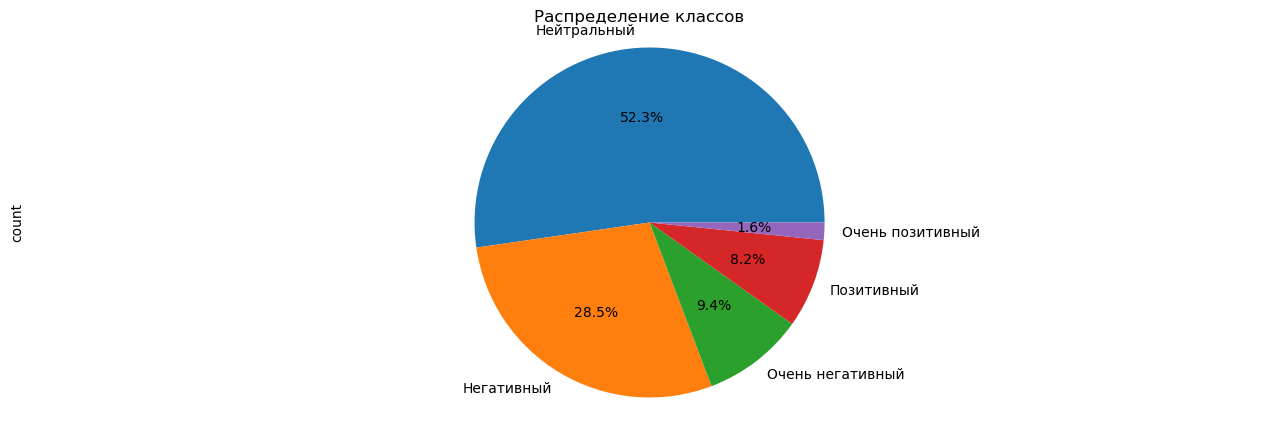

32388


In [104]:
# Словарь для отображения числовых значений в текстовые метки
rating_labels = {-2: 'Очень негативный', -1: 'Негативный', 0: 'Нейтральный', 1: 'Позитивный', 2: 'Очень позитивный'}
Y = original_texts['real_rating']
Y_labeled = Y.replace(rating_labels)

# Диаграмма распределения классов
plt.figure(figsize=(16, 5))
Y_labeled.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Распределение классов    ')
plt.axis('equal')  # Круговая диаграмма должна быть кругом, а не эллипсом
plt.show()
print(len(original_texts))

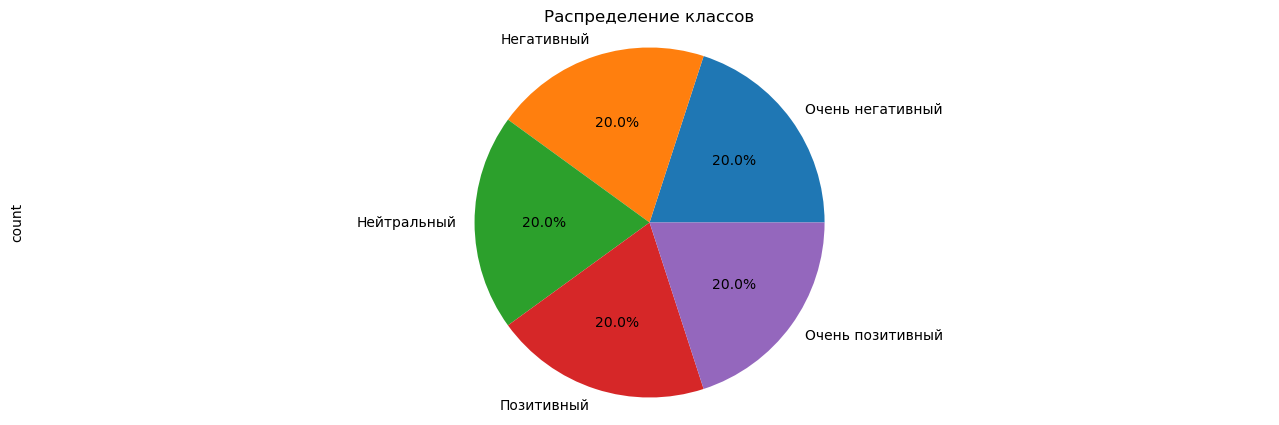

2610


In [105]:
from imblearn.under_sampling import RandomUnderSampler

indexes = np.reshape(original_texts.index, (-1, 1))

indexes_resampled, Y = indexes, original_texts['real_rating']

indexes_resampled, Y = RandomUnderSampler().fit_resample(indexes_resampled, Y)

# Преобразование числовых значений в текстовые метки
Y_labeled = Y.replace(rating_labels)

# Диаграмма распределения классов
plt.figure(figsize=(16, 5))
Y_labeled.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Распределение классов')
plt.axis('equal')  
plt.show()

resampled_texts = original_texts.loc[indexes_resampled.flatten()]

texts = resampled_texts
print(len(Y))


### Исправление опечаток

In [106]:
from autocorrect import Speller

spell = Speller("ru", fast=True)
texts['corrected'] = texts['text'].apply(spell)
corrected = pd.read_csv(f'all_corrected.csv')["corrected"]
texts['corrected'] = corrected.loc[indexes_resampled.flatten()]


### Удаление лишних символов

In [107]:
import re

def remove_punctuation_and_digits(text):
    # Удаление знаков препинания
    text_without_punctuation = re.sub(r'[^\w\s]', '', text)
    # Удаление цифр
    text_without_punctuation_and_digits = re.sub(r'\d', '', text_without_punctuation)
    return text_without_punctuation_and_digits
texts['cleaned_text'] = texts['corrected'].apply(remove_punctuation_and_digits)
texts['cleaned_text']

26296    говорят в пять часов утра хлынула вода из ливн...
28299    только ничтожная часть переселенцев наиболее з...
23448    в населенных пунктах кафрлета бикфалюн забур к...
29068    в районе города бинниш боевики обстреляли воен...
30956    да ладно нормальная говно и есть говно наверня...
                               ...                        
31602    очистив поток нашего сознания от всех грубых и...
31682    они узрели сады леса величественные терема и р...
31774    в трудных условиях боя взвод под командованием...
31792    на стенах портреты героев здесь проходят уроки...
31864    со дня своего основания армия известна своими ...
Name: cleaned_text, Length: 2610, dtype: object

### Токенизация

In [108]:
from nltk.tokenize import word_tokenize
texts['tokenized'] = texts['cleaned_text'].apply(word_tokenize)
texts

,text,real_rating,corrected,cleaned_text,tokenized
26296,"говорят, в пять часов утра хлынула вода из лив...",-2.0,"говорят, в пять часов утра хлынула вода из лив...",говорят в пять часов утра хлынула вода из ливн...,"[говорят, в, пять, часов, утра, хлынула, вода,..."
28299,"только ничтожная часть переселенцев, наиболее ...",-2.0,"только ничтожная часть переселенцев, наиболее ...",только ничтожная часть переселенцев наиболее з...,"[только, ничтожная, часть, переселенцев, наибо..."
23448,"в населенных пунктах кафр-лята, бикфалюн, бзаб...",-2.0,"в населенных пунктах кафр-лета, бикфалюн, забу...",в населенных пунктах кафрлета бикфалюн забур к...,"[в, населенных, пунктах, кафрлета, бикфалюн, з..."
29068,в районе города бинниш боевики обстреляли воен...,-2.0,в районе города бинниш боевики обстреляли воен...,в районе города бинниш боевики обстреляли воен...,"[в, районе, города, бинниш, боевики, обстрелял..."
30956,"да ладно, нормальная… говно и есть говно. наве...",-2.0,"да ладно, нормальная… говно и есть говно. наве...",да ладно нормальная говно и есть говно наверня...,"[да, ладно, нормальная, говно, и, есть, говно,..."
...,...,...,...,...,...
31602,очистив поток нашего сознания от всех грубых и...,2.0,очистив поток нашего сознания от всех грубых и...,очистив поток нашего сознания от всех грубых и...,"[очистив, поток, нашего, сознания, от, всех, г..."
31682,"они узрели сады, леса, величественные терема и...",2.0,"они узрели сады, леса, величественные терема и...",они узрели сады леса величественные терема и р...,"[они, узрели, сады, леса, величественные, тере..."
31774,в трудных условиях боя взвод под командованием...,2.0,в трудных условиях боя взвод под командованием...,в трудных условиях боя взвод под командованием...,"[в, трудных, условиях, боя, взвод, под, команд..."
31792,на стенах портреты героев. здесь проходят урок...,2.0,на стенах портреты героев. здесь проходят урок...,на стенах портреты героев здесь проходят уроки...,"[на, стенах, портреты, героев, здесь, проходят..."


### Стемминг

In [109]:
from nltk.stem.snowball import SnowballStemmer
ps = SnowballStemmer("russian")

def stemming(tokens):
    return [ps.stem(x) for x in tokens]
texts['stemmed'] = texts['tokenized'].apply(stemming)
texts['stemmed']

26296    [говор, в, пят, час, утр, хлынул, вод, из, лив...
28299    [тольк, ничтожн, част, переселенц, наибол, заж...
23448    [в, населен, пункт, кафрлет, бикфалюн, забур, ...
29068    [в, район, город, бинниш, боевик, обстреля, во...
30956    [да, ладн, нормальн, говн, и, ест, говн, навер...
                               ...                        
31602    [очист, поток, наш, сознан, от, всех, груб, и,...
31682    [он, узрел, сад, лес, величествен, терем, и, р...
31774    [в, трудн, услов, бо, взвод, под, командован, ...
31792    [на, стен, портрет, геро, зде, проход, урок, м...
31864    [со, дня, сво, основан, арм, известн, сво, гер...
Name: stemmed, Length: 2610, dtype: object

### Лемматизация


In [110]:
import ast
import spacy
# nlp = spacy.load("ru_core_news_sm")
# def  lemmatize(text):
#     return [x.lemma_ for x in nlp(text)]
# texts['lemmatized'] = texts['cleaned_text'].apply(lemmatize)
# texts[['lemmatized']].to_csv('lemmatized_texts.csv')

lemmatized = pd.read_csv('lemmatized_texts.csv')["lemmatized"].apply(ast.literal_eval)
texts['lemmatized'] = lemmatized.loc[indexes_resampled.flatten()]

### Удаление стоп-слов

In [111]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('russian'))
def delete_stop_words(word_tokens):

    return [w for w in word_tokens if not w in stop_words]

filtered_sentence = []

texts['filtered'] = texts['lemmatized'].apply(delete_stop_words)
texts['filtered']


26296    [говорить, пять, час, утро, хлынуть, вода, лив...
28299    [ничтожный, часть, переселенец, наиболее, зажи...
23448    [населить, пункт, кафрлета, бикфалюн, забур, к...
29068    [район, город, бинниш, боевик, обстрелять, вое...
30956    [ладно, нормальный, говно, говно, наверняка, с...
                               ...                        
31602    [очистить, поток, наш, сознание, весь, грубый,...
31682    [узреть, сад, лес, величественный, терем, роск...
31774    [трудный, условие, бой, взвод, командование, т...
31792    [стена, портрет, герой, проходить, урок, мужес...
31864    [день, свой, основание, армия, известный, свой...
Name: filtered, Length: 2610, dtype: object

## Векторизация
### Bag of Words

In [112]:
from sklearn.feature_extraction.text import CountVectorizer
max_features = 20000
# Преобразование текстов в мешок слов
vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform([' '.join(token) for token in  texts['filtered']])
X_bow

<2610x37179 sparse matrix of type '<class 'numpy.int64'>'
	with 238979 stored elements in Compressed Sparse Row format>

### TF-IDF 

In [113]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Преобразование текстов в TF-IDF
vectorizer_tfidf = TfidfVectorizer(max_features=max_features)
X_tfidf = vectorizer_tfidf.fit_transform([' '.join(token) for token in  texts['filtered']])
X_tfidf

<2610x20000 sparse matrix of type '<class 'numpy.float64'>'
	with 221800 stored elements in Compressed Sparse Row format>

### Word2Vec

In [114]:
from gensim.models import Word2Vec

vector_size = 200
# Обучение модели Word2Vec
model_w2v = Word2Vec(sentences=texts['filtered'], vector_size=vector_size, window=5,workers=4, max_final_vocab=max_features)
model_w2v.save("word2vec.model")


In [115]:
model_w2v = Word2Vec.load("word2vec.model")
def vectorize(words):
    words_vecs = [model_w2v.wv[word] for word in words if word in model_w2v.wv]
    if len(words_vecs) == 0:
        return np.zeros(vector_size)
    words_vecs = np.array(words_vecs)
    return words_vecs.mean(axis=0)

X_w2v = np.array([vectorize(sentence) for sentence in texts['filtered']])



## Реализация алгоритмов классификации

### Наивный байесовский классификатор

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

d = {"w2v":X_w2v,
     "bow": X_bow,
     "tfidf": X_tfidf}

for name, X in d.items():
    # Разделение данных на обучающий и тестовый наборы
    X_train, X_test, y_train, y_test = train_test_split(X, texts['real_rating'], test_size=0.2, random_state=42)
    X_test, y_test = RandomUnderSampler().fit_resample(X_test, y_test)
    # Инициализация и обучение наивного байесовского классификатора
    if name == "w2v":
        nb_classifier = GaussianNB()
    else:
        nb_classifier = MultinomialNB()

    nb_classifier.fit(X_train, y_train)

    # Прогнозирование
    nb_predictions = nb_classifier.predict(X_test)

    # Оценка точности
    nb_accuracy = accuracy_score(y_test, nb_predictions)
    print(f'Accuracy Naive Bayes ({name}): {nb_accuracy}')



Accuracy Naive Bayes (w2v): 0.21666666666666667
Accuracy Naive Bayes (bow): 0.28541666666666665
Accuracy Naive Bayes (tfidf): 0.2916666666666667


### SVM

In [117]:
from sklearn.svm import SVC

for name, X in d.items():
    # Разделение данных на обучающий и тестовый наборы
    X_train, X_test, y_train, y_test = train_test_split(X, texts['real_rating'], test_size=0.2, random_state=42)
    X_test, y_test = RandomUnderSampler().fit_resample(X_test, y_test)
    # Инициализация и обучение SVM
    svm_classifier = SVC()
    svm_classifier.fit(X_train, y_train)

    # Прогнозирование
    svm_predictions = svm_classifier.predict(X_test)

    # Оценка точности
    svm_accuracy = accuracy_score(y_test, svm_predictions)
    print(f'Accuracy SVM ({name}): {svm_accuracy}')


Accuracy SVM (w2v): 0.23958333333333334
Accuracy SVM (bow): 0.26458333333333334
Accuracy SVM (tfidf): 0.2875


### Деревья решений

In [118]:
from sklearn.tree import DecisionTreeClassifier

for name, X in d.items():
    # Разделение данных на обучающий и тестовый наборы
    X_train, X_test, y_train, y_test = train_test_split(X, texts['real_rating'], test_size=0.2, random_state=42)
    X_test, y_test = RandomUnderSampler().fit_resample(X_test, y_test)
    # Инициализация и обучение дерева решений
    dt_classifier = DecisionTreeClassifier()
    dt_classifier.fit(X_train, y_train)

    # Прогнозирование
    dt_predictions = dt_classifier.predict(X_test)

    # Оценка точности
    dt_accuracy = accuracy_score(y_test, dt_predictions)
    print(f'Accuracy Decision Tree ({name}): {dt_accuracy}')


Accuracy Decision Tree (w2v): 0.24375
Accuracy Decision Tree (bow): 0.2520833333333333
Accuracy Decision Tree (tfidf): 0.2625


### ансамбли

In [119]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


X_train, X_test, y_train, y_test = train_test_split(X_tfidf, texts['real_rating'], test_size=0.2, random_state=42)
X_test, y_test = RandomUnderSampler().fit_resample(X_test, y_test)

# Создание ансамбля
ensemble_classifier = VotingClassifier(estimators=[
    ('nb', MultinomialNB()),
    ('lr', LogisticRegression()),
    ('svc', SVC())
], voting='hard')  # 'hard' для классификации по большинству голосов

# Обучение ансамбля
ensemble_classifier.fit(X_train, y_train)

# Прогнозирование
ensemble_predictions = ensemble_classifier.predict(X_test)

# Оценка точности
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
print(f'Accuracy Ensemble: {ensemble_accuracy}')


Accuracy Ensemble: 0.275


In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.under_sampling import RandomUnderSampler

X = X_tfidf
# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, texts['real_rating'], test_size=0.2, random_state=42)
X_test, y_test = RandomUnderSampler().fit_resample(X_test, y_test)

# Инициализация и обучение логистической регрессии
logreg_classifier = LogisticRegression()
logreg_classifier.fit(X_train, y_train)

# Прогнозирование
logreg_predictions = logreg_classifier.predict(X_test)

# Оценка точности
logreg_accuracy = accuracy_score(y_test, logreg_predictions)
print(f'Accuracy Logistic Regression: {logreg_accuracy}')


Accuracy Logistic Regression: 0.26458333333333334


## Подход на основе тонального словаря
убрать незначимые нейтральные слова


In [121]:
word_tone_mean = tone_dictionary.set_index('Words')['average rate'].to_dict()
word_tone_mean

{'аборигенный': 0,
 'аборт': -1,
 'абрамович': 0,
 'абсолютный': 0,
 'абстрактный': 0,
 'абсурд': -1,
 'абсурдно': -1,
 'абсурдный': -1,
 'абхаз': 0,
 'абхазия': 0,
 'авантюра': 0,
 'авантюрный': 0,
 'аварийный': -1,
 'авария': -1,
 'август': 0,
 'авианосец': 0,
 'авиационный': 0,
 'авиация': 0,
 'австралиец': 0,
 'австралийский': 0,
 'австралия': 0,
 'австриец': 0,
 'австрийский': 0,
 'австрия': 0,
 'австро-венгрия': 0,
 'авто': 0,
 'автобиографический': 0,
 'автовладелец': 0,
 'автодорога': 0,
 'автолюбитель': 0,
 'автомат': -1,
 'автоматический': 0,
 'автоматчик': 0,
 'автомобилист': 0,
 'автомобильный': 0,
 'автономный': 0,
 'автор': 0,
 'автореферат': 0,
 'авторитет': 0,
 'авторитетный': 1,
 'автотранспорт': 0,
 'автошкола': 0,
 'ага': 0,
 'агент': 0,
 'агентство': 0,
 'агитационный': 0,
 'агитка': -1,
 'агония': -1,
 'аграрный': 0,
 'агрессивный': -1,
 'агрессия': -1,
 'адвокат': 0,
 'адвокатский': 0,
 'адекватно': 1,
 'адекватный': 1,
 'административный': 0,
 'администрация': 0,

In [122]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier

texts = texts.reset_index(drop=True)

 
tones_data = []

for index, row in texts.iterrows():
    tone_counts = {'-1': 0,"-2":0,"0":0,"2":0, '1': 0}
    for word in row['text'].split():
        tone = word_tone_mean.get(word, 0)
        tone_counts[str(tone)] += abs(tone)
        if tone == 0:
            tone_counts[str(tone)] +=1
    tones_data.append(tone_counts)

tones_df = pd.DataFrame(tones_data)


rating = texts['real_rating']
texts['real_rating'] = texts['real_rating'].replace({-2: -1, 2: 1})



X_train, X_test, y_train, y_test = train_test_split(tones_df, rating, test_size=0.2, random_state=42)

ensemble_classifier = VotingClassifier(estimators=[
    ('nb', MultinomialNB()),
    ('lr', LogisticRegression()),
    ('svc', SVC())
], voting='hard')

ensemble_classifier.fit(X_train, y_train)

ensemble_predictions = ensemble_classifier.predict(X_test)

ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
print(f'Accuracy Ensemble: {ensemble_accuracy}')

models = [
    KNeighborsClassifier(),
    BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42),
    RandomForestClassifier(n_estimators=10, random_state=42)
]

for model in models:
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)

    accuracy = accuracy_score(y_test, predictions)
    model_name = type(model).__name__
    print(f'Accuracy {model_name}: {accuracy}')

d:\anaconda\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Ensemble: 0.22413793103448276
Accuracy KNeighborsClassifier: 0.21455938697318008
Accuracy BaggingClassifier: 0.23946360153256704
Accuracy RandomForestClassifier: 0.24521072796934865


In [123]:
tones_data = []

for index, row in texts.iterrows():
    tone_values = []
    for word in row['filtered']:
        word_importance = X_tfidf[index, vectorizer_tfidf.vocabulary_.get(word, 3)]

        tone = word_tone_mean.get(word, 0) * word_importance
        
        if not(tone == 0):
            tone_values.append(tone)

    if tone_values:
        median_tone = np.median(tone_values)
    else:
        median_tone = 0

    tones_data.append({'median_tone': median_tone})

tones_df = pd.DataFrame(tones_data)

texts_combined = pd.concat([texts, tones_df], axis=1)


X_train, X_test, y_train, y_test = train_test_split(texts_combined[['median_tone']], texts_combined['real_rating'], test_size=0.2, random_state=42)

median_predictions = np.where(X_test['median_tone'] > 0, 1, -1)

median_accuracy = accuracy_score(y_test, median_predictions)
print(f'Accuracy: {median_accuracy}')


Accuracy: 0.5402298850574713
